In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Ścieżka do pliku CSV
file_path = "rgb_Tp_S.csv"

# Wczytanie pliku CSV do DataFrame
df = pd.read_csv(file_path)

# Wyświetlenie pierwszych 5 wierszy DataFrame
df.head()

,loss,accuracy,AUC,Precision,Recall,TP,TN,val_loss,val_accuracy,val_AUC,val_Precision,val_Recall,val_TP,val_TN
0,0.669093,0.588806,0.656616,0.571970,0.681203,453.0,336.0,0.604560,0.662121,0.744395,0.761682,0.486567,163.0,274.0
1,0.576893,0.698507,0.764194,0.701079,0.684211,455.0,481.0,0.616157,0.650000,0.782379,0.866197,0.367164,123.0,306.0
2,0.547691,0.724627,0.796676,0.740260,0.685714,456.0,515.0,0.532793,0.731818,0.837516,0.688095,0.862687,289.0,194.0
3,0.520500,0.747761,0.824186,0.752705,0.732331,487.0,515.0,0.513489,0.774242,0.851049,0.762712,0.805970,270.0,241.0
4,0.494372,0.760448,0.843799,0.762195,0.751880,500.0,519.0,0.485317,0.778788,0.867187,0.770774,0.802985,269.0,245.0


In [37]:
max_values = df.max()
max_values

loss               0.669093
accuracy           0.949254
AUC                0.987962
Precision          0.950226
Recall             0.947368
TP               630.000000
TN               642.000000
val_loss           0.651782
val_accuracy       0.809091
val_AUC            0.888804
val_Precision      0.866197
val_Recall         0.886567
val_TP           297.000000
val_TN           306.000000
dtype: float64

In [38]:
min = df['val_loss'].idxmin()
df.loc[min]

loss               0.338589
accuracy           0.858955
AUC                0.930296
Precision          0.861702
Recall             0.852632
TP               567.000000
TN               584.000000
val_loss           0.440369
val_accuracy       0.795455
val_AUC            0.881171
val_Precision      0.789017
val_Recall         0.814925
val_TP           273.000000
val_TN           252.000000
Name: 9, dtype: float64

In [20]:
df.columns = [
    'auc_trening', 'Precyzja Trening', 'Czułość Trening',
    'tn_trening', 'tp_trening', 'Dokładność Trening', 'Strata Trening',
    'auc_test', 'Precyzja Test', 'Czułość Test',
    'tn_test', 'tp_test', 'Dokładność Test', 'Strata Test'
]
df.head()

,auc_trening,Precyzja Trening,Czułość Trening,tn_trening,tp_trening,Dokładność Trening,Strata Trening,auc_test,Precyzja Test,Czułość Test,tn_test,tp_test,Dokładność Test,Strata Test
0,0.676443,0.567910,0.611850,0.552184,0.684211,455.0,306.0,0.660952,0.575758,0.757327,0.866667,0.194030,65.0,315.0
1,0.645391,0.629104,0.664515,0.661538,0.517293,344.0,499.0,0.652189,0.590909,0.754158,0.842105,0.238806,80.0,310.0
2,0.598746,0.683582,0.737263,0.731286,0.572932,381.0,535.0,0.583635,0.712121,0.800009,0.674699,0.835821,280.0,190.0
3,0.563032,0.708209,0.776475,0.737024,0.640602,426.0,523.0,0.549254,0.737879,0.812565,0.785211,0.665672,223.0,264.0
4,0.554090,0.716418,0.794657,0.739496,0.661654,440.0,520.0,0.651461,0.633333,0.799541,0.854962,0.334328,112.0,306.0


In [26]:
df.columns = [
    'Strata Trening', 'Dokładność Trening', 'auc_trening', 'Precyzja Trening',
    'Czułość Trening', 'tp_trening', 'tn_trening', 'Strata Test', 'Dokładność Test',
    'auc_test', 'Precyzja Test', 'Czułość Test', 'tp_test', 'tn_test'
]
df.head()

,Strata Trening,Dokładność Trening,auc_trening,Precyzja Trening,Czułość Trening,tp_trening,tn_trening,Strata Test,Dokładność Test,auc_test,Precyzja Test,Czułość Test,tp_test,tn_test
0,0.682223,0.564179,0.596482,0.551072,0.657143,437.0,319.0,0.628141,0.653030,0.707467,0.674342,0.611940,205.0,226.0
1,0.652387,0.621642,0.670384,0.629508,0.577444,384.0,449.0,0.635002,0.665152,0.725658,0.673781,0.659701,221.0,218.0
2,0.620076,0.676866,0.725262,0.658904,0.723308,481.0,426.0,0.608799,0.674242,0.732000,0.658730,0.743284,249.0,196.0
3,0.608581,0.674627,0.732874,0.658807,0.714286,475.0,429.0,0.605416,0.684848,0.740266,0.678873,0.719403,241.0,211.0
4,0.584801,0.699254,0.758298,0.689855,0.715789,476.0,461.0,0.609859,0.681818,0.737920,0.681159,0.701493,235.0,215.0


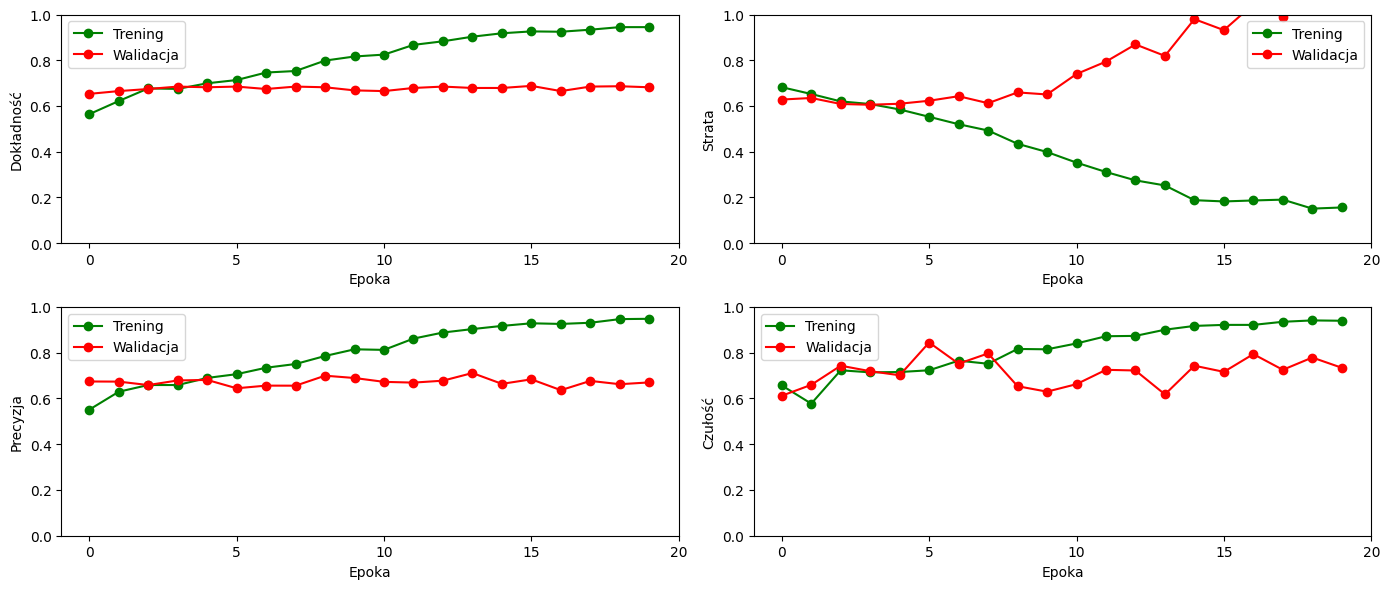

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
 
# Ustawienia osi x
x_ticks = [0, 5, 10, 15, 20]
 
# Wykres dla Dokładności
axes[0, 0].plot(df['Dokładność Trening'], label='Trening', color='green', marker='o')
axes[0, 0].plot(df['Dokładność Test'], label='Walidacja', color='red', marker='o')
axes[0, 0].set_xlabel('Epoka')
axes[0, 0].set_ylabel('Dokładność')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_xticks(x_ticks)
axes[0, 0].legend()
 
# Wykres dla Straty
axes[0, 1].plot(df['Strata Trening'], label='Trening', color='green', marker='o')
axes[0, 1].plot(df['Strata Test'], label='Walidacja', color='red', marker='o')
axes[0, 1].set_xlabel('Epoka')
axes[0, 1].set_ylabel('Strata')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_xticks(x_ticks)
axes[0, 1].legend()
 
# Wykres dla Precyzji
axes[1, 0].plot(df['Precyzja Trening'], label='Trening', color='green', marker='o')
axes[1, 0].plot(df['Precyzja Test'], label='Walidacja', color='red', marker='o')
axes[1, 0].set_xlabel('Epoka')
axes[1, 0].set_ylabel('Precyzja')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_xticks(x_ticks)
axes[1, 0].legend()
 
# Wykres dla Czułości
axes[1, 1].plot(df['Czułość Trening'], label='Trening', color='green', marker='o')
axes[1, 1].plot(df['Czułość Test'], label='Walidacja', color='red', marker='o')
axes[1, 1].set_xlabel('Epoka')
axes[1, 1].set_ylabel('Czułość')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_xticks(x_ticks)
axes[1, 1].legend()
 
# Zapis do pliku SVG
plt.tight_layout()
plt.savefig('training_rgb.svg', format='svg')
plt.show()